### Based on https://github.com/HTuennermann/Vehicle-Detection-and-Tracking/

In [112]:
import glob 
import cv2
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline


In [164]:
cars = glob.glob("./vehicles/*/*.png")
non_cars = glob.glob("./non-vehicles/*/*.png")

# Generate Y Vector
Y = np.concatenate([np.ones(len(cars)), np.zeros(len(non_cars))-1])

# Read X Vector
X = []
for name in cars:    
    X.append(skimage.io.imread(name))
for name in non_cars:    
    X.append(skimage.io.imread(name))
X = np.array(X)

print(X.shape)
print(Y.shape)


(17760, 64, 64, 3)
(17760,)


In [157]:
car_ski = skimage.io.imread(cars[0])
car_plt = plt.imread(cars[0])

# print(car_ski)
print(np.min(car_plt))
# X = X *255
print(X[0])

0.101961
[[[ 0.42352942  0.44313726  0.41568628]
  [ 0.41568628  0.43921569  0.40784314]
  [ 0.40784314  0.42745098  0.39215687]
  ..., 
  [ 0.53725493  0.52549022  0.35686275]
  [ 0.48627451  0.47450981  0.3137255 ]
  [ 0.45490196  0.4509804   0.28627452]]

 [[ 0.65098041  0.69803923  0.67058825]
  [ 0.65490198  0.7019608   0.67450982]
  [ 0.63137257  0.67843139  0.65098041]
  ..., 
  [ 0.49411765  0.49803922  0.30980393]
  [ 0.49411765  0.49019608  0.3137255 ]
  [ 0.47843137  0.47058824  0.3019608 ]]

 [[ 0.58823532  0.65882355  0.67058825]
  [ 0.60000002  0.67058825  0.68235296]
  [ 0.56862748  0.63921571  0.65490198]
  ..., 
  [ 0.50980395  0.49411765  0.32156864]
  [ 0.56862748  0.5529412   0.38431373]
  [ 0.58431375  0.56078434  0.40000001]]

 ..., 
 [[ 0.20784314  0.25098041  0.24705882]
  [ 0.19215687  0.23137255  0.23137255]
  [ 0.18039216  0.21568628  0.21568628]
  ..., 
  [ 0.24705882  0.27450982  0.25882354]
  [ 0.23529412  0.27450982  0.25882354]
  [ 0.24313726  0.28235295

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (15984, 64, 64, 3)
15984 train samples
1776 test samples


1.0


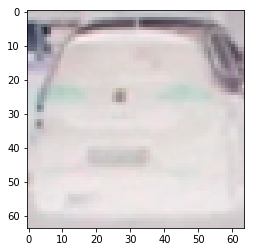

In [153]:
index = 3

plt.imshow(X_train[index])
print(Y_train[index])
# print(y_binary[index])

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


def get_conv(input_shape=(64,64,3), filename=None):
    model = Sequential()
    model.add(Lambda(lambda x: x/255 - 0.5,input_shape=input_shape))
#     model.add(Lambda(lambda x: x*1.0, input_shape=input_shape))
    model.add(Convolution2D(10, 3, 3, activation='relu', name='conv1', border_mode="same"))
    model.add(Convolution2D(10, 3, 3, activation='relu', name='conv2', border_mode="same"))
    model.add(MaxPooling2D(pool_size=(8,8)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(128,8,8,activation="relu",name="dense1")) # This was Dense(128)
    model.add(Dropout(0.5))
    model.add(Convolution2D(1,1,1,name="dense2", activation="tanh")) # This was Dense(1)
#     model.add(Dense(1, activation='softmax'))
    if filename:
        model.load_weights(filename)        
    return model

model = get_conv()
model.add(Flatten())
model.compile(loss='mse',optimizer='adadelta',metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_47 (Lambda)               (None, 64, 64, 3)     0           lambda_input_47[0][0]            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, 64, 10)    280         lambda_47[0][0]                  
____________________________________________________________________________________________________
conv2 (Convolution2D)            (None, 64, 64, 10)    910         conv1[0][0]                      
____________________________________________________________________________________________________
maxpooling2d_80 (MaxPooling2D)   (None, 8, 8, 10)      0           conv2[0][0]                      
___________________________________________________________________________________________

In [167]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
model.save_weights("localize.h5")

Train on 15984 samples, validate on 1776 samples
Epoch 1/20
5s - loss: 0.5162 - acc: 0.5073 - val_loss: 0.4382 - val_acc: 0.7523
Epoch 2/20
4s - loss: 0.1968 - acc: 0.8505 - val_loss: 0.1192 - val_acc: 0.9077
Epoch 3/20
4s - loss: 0.1215 - acc: 0.9108 - val_loss: 0.0879 - val_acc: 0.9319
Epoch 4/20
4s - loss: 0.0922 - acc: 0.9334 - val_loss: 0.0861 - val_acc: 0.9386
Epoch 5/20
4s - loss: 0.0746 - acc: 0.9467 - val_loss: 0.0693 - val_acc: 0.9510
Epoch 6/20
4s - loss: 0.0694 - acc: 0.9518 - val_loss: 0.0611 - val_acc: 0.9566
Epoch 7/20
4s - loss: 0.0577 - acc: 0.9591 - val_loss: 0.0518 - val_acc: 0.9600
Epoch 8/20
4s - loss: 0.0546 - acc: 0.9612 - val_loss: 0.0461 - val_acc: 0.9640
Epoch 9/20
4s - loss: 0.0504 - acc: 0.9638 - val_loss: 0.0536 - val_acc: 0.9600
Epoch 10/20
4s - loss: 0.0456 - acc: 0.9675 - val_loss: 0.0363 - val_acc: 0.9713
Epoch 11/20
4s - loss: 0.0436 - acc: 0.9702 - val_loss: 0.0351 - val_acc: 0.9724
Epoch 12/20
4s - loss: 0.0392 - acc: 0.9712 - val_loss: 0.0344 - val_

-1.0
prediction [[-0.94582945]]


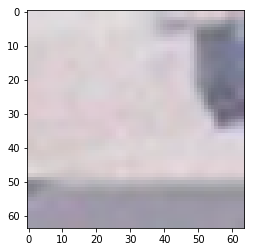

In [162]:
index = 1

plt.imshow(X_test[index])
print(Y_test[index])
prediction = model.predict(X_test[index][None, :, :, :])
print('prediction', prediction)

In [168]:
heatmodel = get_conv(input_shape=(None,None,3), filename="localize.h5")
# that is it!

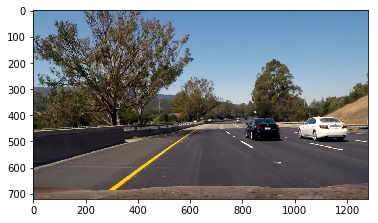

(1, 83, 153, 1)


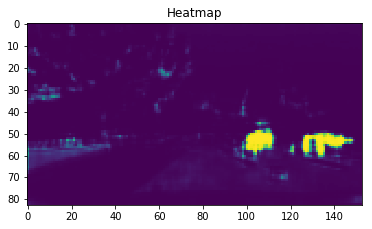

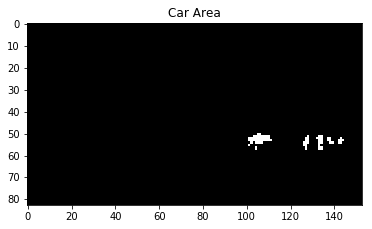

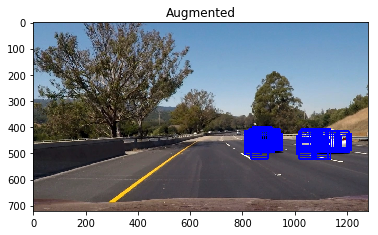

In [174]:

def locate():
    data = (skimage.io.imread("./test_images/test6.jpg"))
    
    heatmap = heatmodel.predict(data[None, :, :, :])
    plt.imshow(data)
    plt.show()
    print(heatmap.shape)
    
    plt.imshow(heatmap[0,:,:,0])
    plt.title("Heatmap")
    plt.show()
    plt.imshow(heatmap[0,:,:,0]>0.99, cmap="gray")
    plt.title("Car Area")
    plt.show()

    xx, yy = np.meshgrid(np.arange(heatmap.shape[2]),np.arange(heatmap.shape[1]))
    x = (xx[heatmap[0,:,:,0]>0.99])
    y = (yy[heatmap[0,:,:,0]>0.99])
    
    for i,j in zip(x,y):
        cv2.rectangle(data, (i*8,j*8), (i*8+64,j*8+64), (0,0,255), 5)
    return data

annotated = locate()

plt.title("Augmented")    
plt.imshow(annotated)
plt.show()